# Análisis Exploratorio de los Datos (EDA)

Librerias a utilizar

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

In [39]:
files = os.listdir('original_datasets')
dataframes_names = [f[:-4] for f in files]
dataframes = []
for index, file in enumerate(files):
    df = pd.read_csv(f'original_datasets/{file}')
    dataframes.append(df)

### *Accesos_provincias.csv*

In [148]:
df = pd.read_csv('original_datasets/Accesos_provincias.csv')
df

,Año,Trimestre,Provincia,Banda ancha fija,Dial up,Total
0,2022,3,Buenos Aires,4.715.469,6.199,4.721.668
1,2022,3,Capital Federal,1.545.534,2.145,1.547.679
2,2022,3,Catamarca,70.292,1,70.293
3,2022,3,Chaco,144.141,5,144.146
4,2022,3,Chubut,164.874,904,165.778
...,...,...,...,...,...,...
835,2014,1,Santa Cruz,26.304,460,26.764
836,2014,1,Santa Fe,506.000,612,506.612
837,2014,1,Santiago Del Estero,37.124,9,37.133
838,2014,1,Tierra Del Fuego,27.272,766,28.038


In [149]:
df['Banda ancha fija'] = df['Banda ancha fija'].str.replace('-', '').str.replace('.', '')
df['Dial up'] = df['Dial up'].str.replace('-', '').str.replace('.', '')
df['Total'] = df['Total'].str.replace('-', '').str.replace('.', '')

In [150]:
df['Banda ancha fija'] = pd.to_numeric(df['Banda ancha fija'])
df['Dial up'] = pd.to_numeric(df['Dial up'])
df['Total'] = pd.to_numeric(df['Total'])

In [151]:
df.dtypes

Año                   int64
Trimestre             int64
Provincia            object
Banda ancha fija      int64
Dial up             float64
Total                 int64
dtype: object

In [152]:
provincias = df.Provincia.unique()
total = [df.Total.loc[df.Provincia == prov].sum() for prov in provincias]

In [173]:
data = df.groupby(by='Provincia').sum().sort_values(by='Total', ascending=False).reset_index()
data.head()

,Provincia,Año,Trimestre,Banda ancha fija,Dial up,Total
0,Buenos Aires,70626,86,123014356,340191.0,123354547
1,Capital Federal,70626,86,48866626,204979.0,49071605
2,Córdoba,70626,86,26261491,4596.0,26266087
3,Santa Fe,70626,86,23944031,12229.0,23956260
4,Entre Ríos,70626,86,7249381,2569.0,7251950


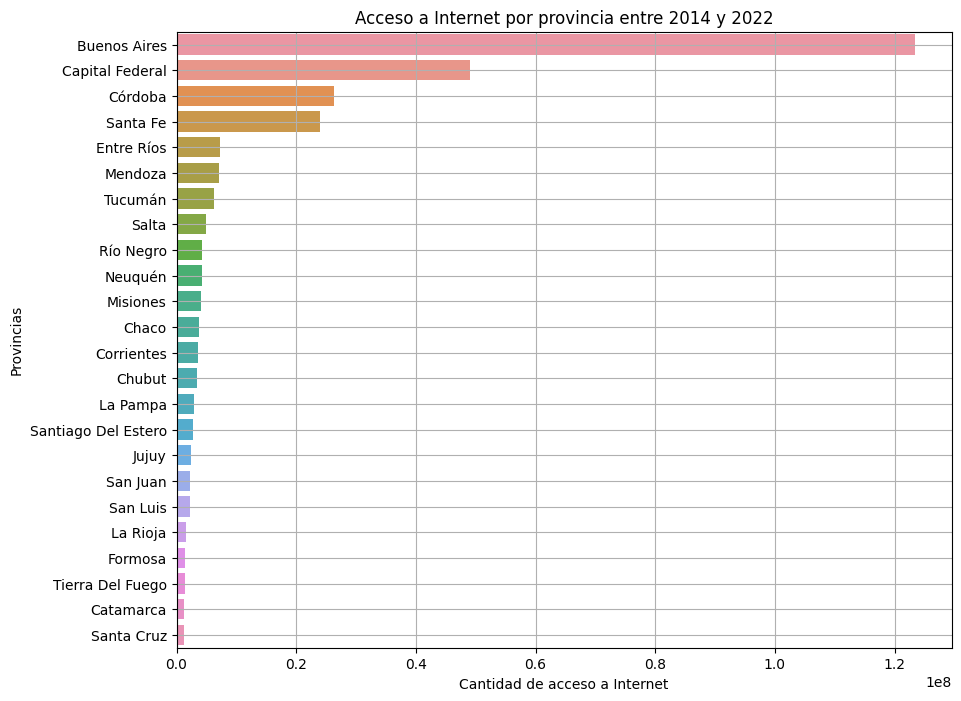

In [176]:
plt.figure(figsize=(10,8))
sns.barplot(data= data, x='Total', y='Provincia')
plt.title('Acceso a Internet por provincia entre 2014 y 2022')
plt.xlabel('Cantidad de acceso a Internet')
plt.grid('True')
plt.ylabel('Provincias')
plt.show()

Muestro en un grafico el progreso de las 5 mejores provincias en función de la cantidad de accesos a Internet

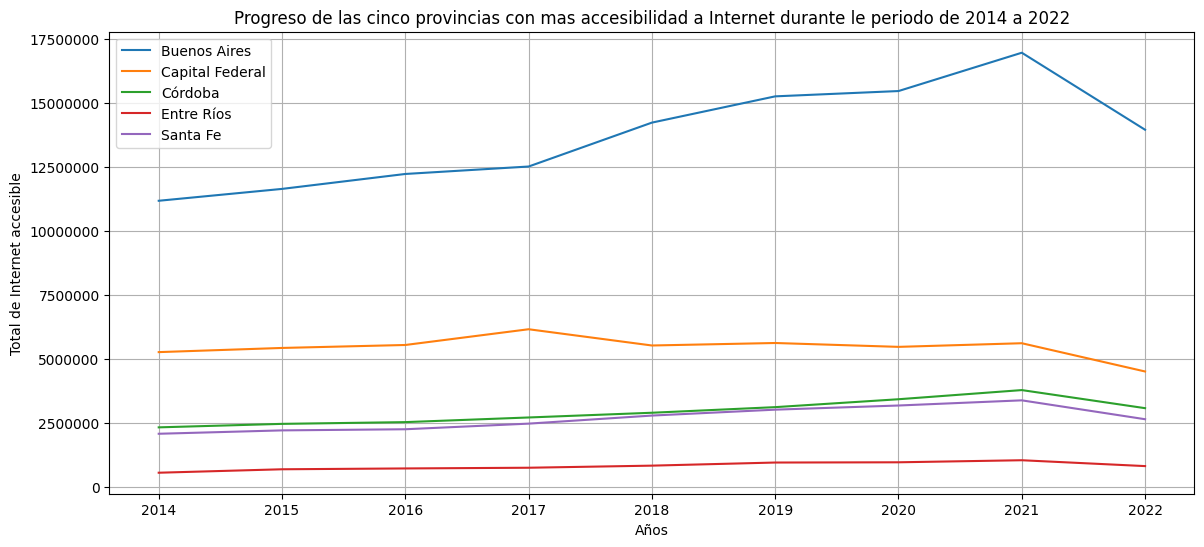

In [206]:
lista = data[:5].Provincia.unique()
d = df.loc[df.Provincia.isin(lista)].groupby(by=['Provincia','Año']).sum()
plt.figure(figsize=(14,6))
sns.lineplot(data = d, x= 'Año', y='Total', hue='Provincia')
plt.ticklabel_format(style='plain', axis='y') # Pongo el eje 'y' con valores numericos de grandes cifras
plt.grid(True)
plt.legend()
plt.title('Progreso de las cinco provincias con mas accesibilidad a Internet durante le periodo de 2014 a 2022')
plt.xlabel('Años')
plt.ylabel('Total de Internet accesible')
plt.show()

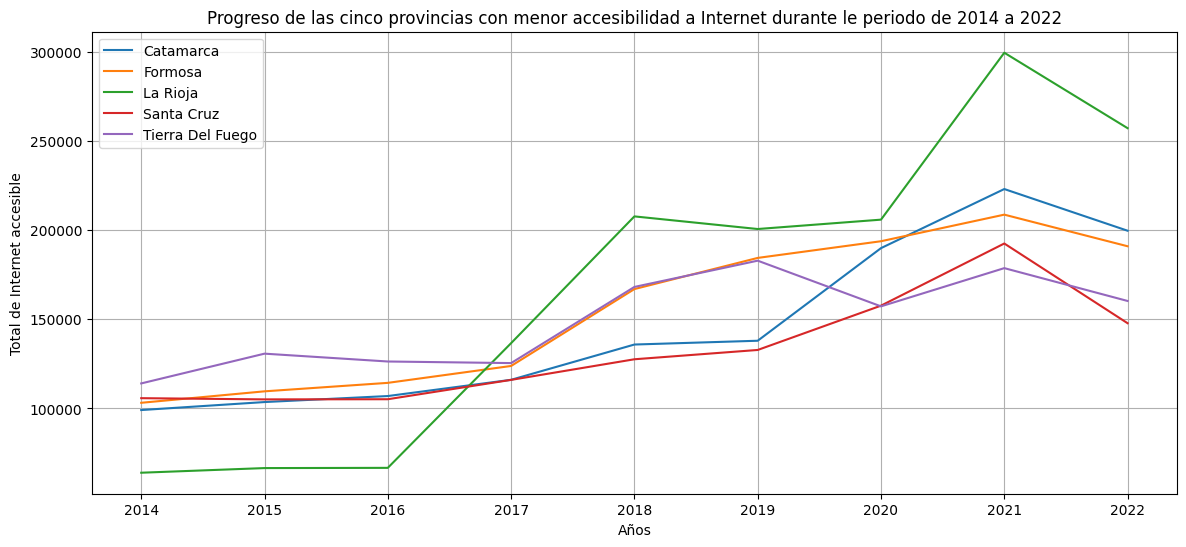

In [209]:
lista = data[-5:].Provincia.unique()
d = df.loc[df.Provincia.isin(lista)].groupby(by=['Provincia','Año']).sum()
plt.figure(figsize=(14,6))
sns.lineplot(data = d, x= 'Año', y='Total', hue='Provincia')
plt.ticklabel_format(style='plain', axis='y') # Pongo el eje 'y' con valores numericos de grandes cifras
plt.grid(True)
plt.legend()
plt.title('Progreso de las cinco provincias con menor accesibilidad a Internet durante le periodo de 2014 a 2022')
plt.xlabel('Años')
plt.ylabel('Total de Internet accesible')
plt.show()

### Dataset *historico_velocidad_internet_provincias.csv*

In [214]:
velocidad_provincias = pd.read_csv('original_datasets/historico_velocidad_internet_provincias.csv')
velocidad_provincias

,Año,Trimestre,Provincia,Mbps (Media de bajada),Unnamed: 4,Unnamed: 5
0,2022,3,Buenos Aires,70,NaN,NaN
1,2022,3,Capital Federal,101,NaN,NaN
2,2022,3,Catamarca,61,NaN,NaN
3,2022,3,Chaco,53,NaN,NaN
4,2022,3,Chubut,16,NaN,NaN
...,...,...,...,...,...,...
835,2014,1,Santa Cruz,3,NaN,NaN
836,2014,1,Santa Fe,3,NaN,NaN
837,2014,1,Santiago Del Estero,3,NaN,NaN
838,2014,1,Tierra Del Fuego,3,NaN,NaN


In [215]:
velocidad_provincias = velocidad_provincias.drop(columns={'Unnamed: 4','Unnamed: 5'})

In [224]:
velocidad_provincias.groupby(

,Año,Trimestre,Provincia,Mbps (Media de bajada)
0,2022,3,Buenos Aires,70
1,2022,3,Capital Federal,101
2,2022,3,Catamarca,61
3,2022,3,Chaco,53
4,2022,3,Chubut,16
...,...,...,...,...
835,2014,1,Santa Cruz,3
836,2014,1,Santa Fe,3
837,2014,1,Santiago Del Estero,3
838,2014,1,Tierra Del Fuego,3


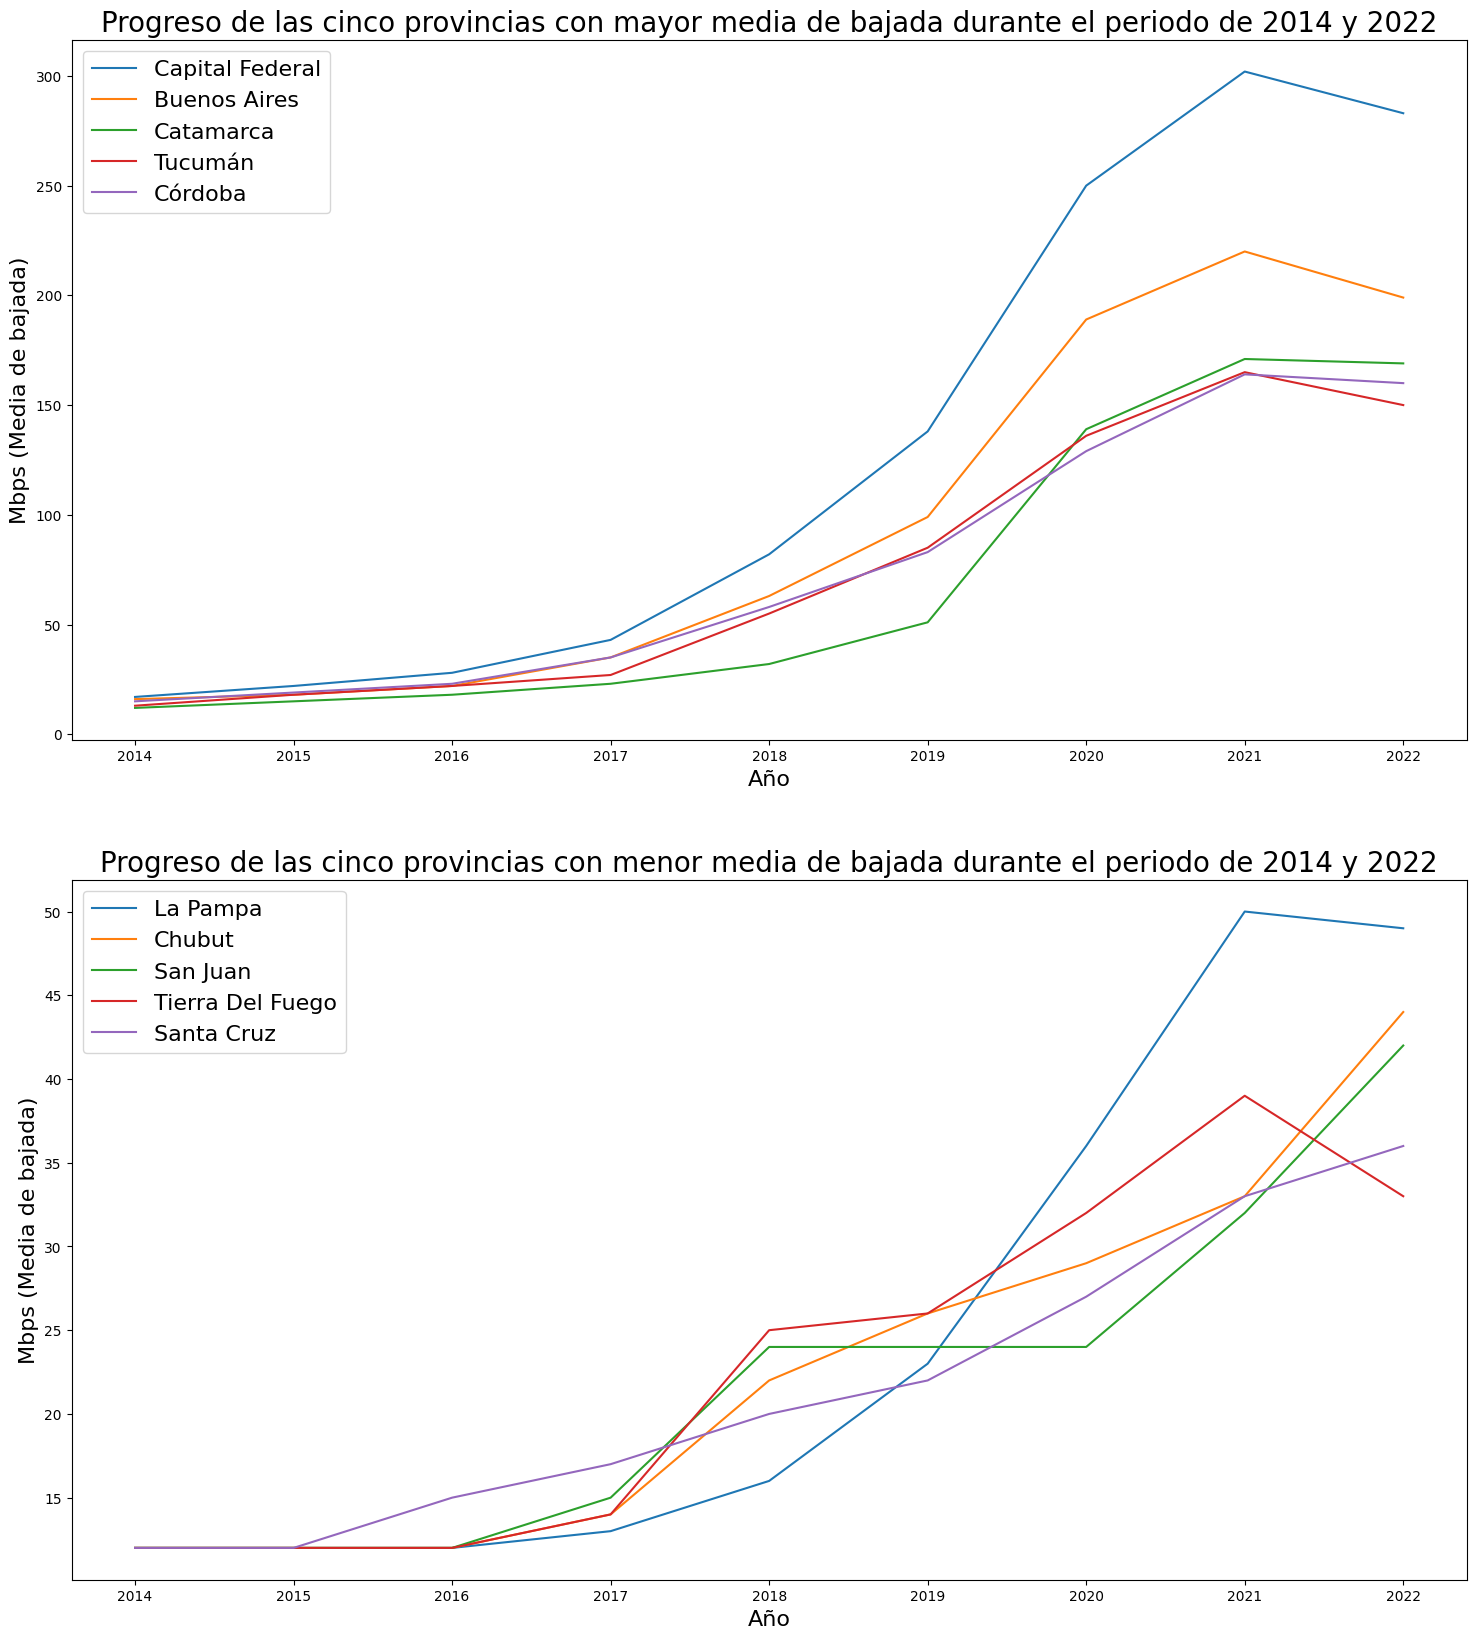

In [259]:
df = velocidad_provincias.groupby(by=['Provincia', 'Año']).sum().reset_index().sort_values(by='Mbps (Media de bajada)', ascending=False)
mejores_provincias = df.loc[df.Provincia.isin(df.Provincia.unique()[:5])]
peores_provincias = df.loc[df.Provincia.isin(df.Provincia.unique()[-5:])]


fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(18, 20))

sns.lineplot(data=mejores_provincias, x='Año', y='Mbps (Media de bajada)', hue='Provincia', ax=axes[0], legend='full')
axes[0].set_title('Progreso de las cinco provincias con mayor media de bajada durante el periodo de 2014 y 2022', fontsize=20)

sns.lineplot(data=peores_provincias, x='Año', y='Mbps (Media de bajada)', hue='Provincia', ax=axes[1], legend='full')
axes[1].set_title('Progreso de las cinco provincias con menor media de bajada durante el periodo de 2014 y 2022', fontsize=20)

# Ajustar tamaño de letra en la leyenda
axes[0].legend(fontsize=16)
axes[0].set_xlabel('Año', fontsize=16)
axes[0].set_ylabel('Mbps (Media de bajada)', fontsize=16)

axes[1].legend(fontsize=16)
axes[1].set_xlabel('Año', fontsize=16)
axes[1].set_ylabel('Mbps (Media de bajada)', fontsize=16)

plt.show()



<AxesSubplot: xlabel='Año', ylabel='Mbps (Media de bajada)'>

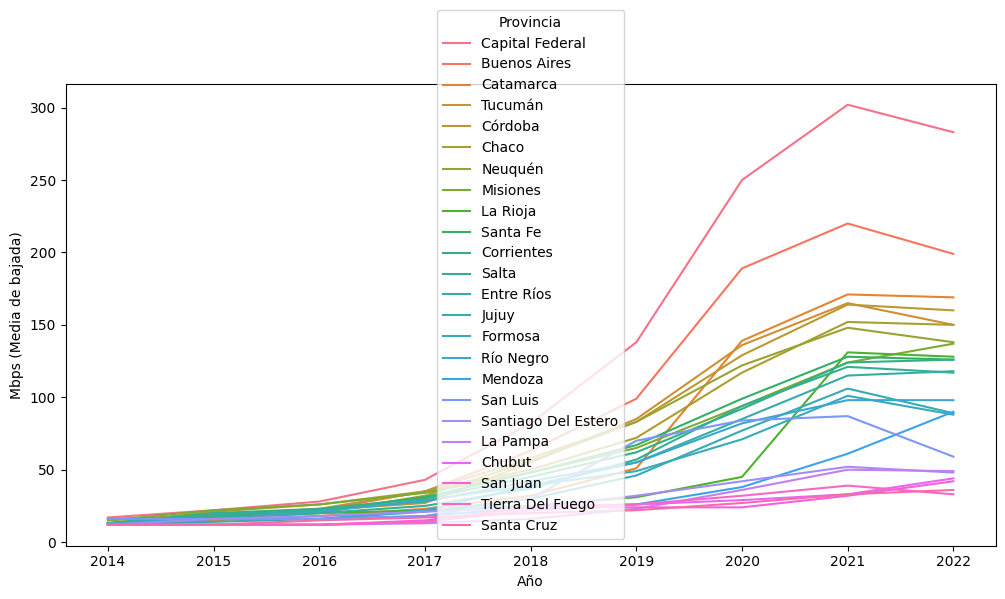

In [226]:
d = velocidad_provincias.groupby(by=['Provincia', 'Año']).sum().reset_index().sort_values(by='Mbps (Media de bajada)', ascending=False)
plt.figure(figsize=(12,6))
sns.lineplot(data= d, x='Año', y='Mbps (Media de bajada)', hue='Provincia')